In [8]:
import pandas as pd
from tqdm import tqdm
from database.strategy import Strategy
from database.market import Market
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import math
import numpy as np
import statistics
from sklearn.preprocessing import normalize

In [9]:
strat_db = Strategy("unity")
market = Market()

In [10]:
market.connect()
sp5 = market.retrieve_data("sp500")
market.close()

In [11]:
strat_db.connect()
tse = strat_db.retrieve_data("tsmc_epochs")
strat_db.close()

In [12]:
seats = 10
tsmc = "full"
strat_db.connect()
analysis = []
for epoch in tse["epoch"].unique():
    epoch_dict = tse.iloc[epoch]
    trades = strat_db.retrieve_data("tsmc_{}".format(epoch))
    if trades.index.size < 1:
        print(epoch,trades.index.size)
        continue
    else:
        for seat in range(1,seats+1):
            initial = 100/seats
            seat_trades = trades[trades["seat"] == seat]
            if seat_trades.index.size > 0:
                for delta in seat_trades["sell_delta"]:
                    initial = initial * (1 + delta)
                stg = seat_trades.groupby("seat").mean().reset_index()[["adjclose","sell_price","seat","sell_delta"]]
                stg["epoch"] = epoch
                stg["score"] = epoch_dict["score"]
                
                stg["ascending"] = epoch_dict["ascending"]
                stg["wdr"] = epoch_dict["wdr"]
                if tsmc == "industry":
                    stg["industry"] = epoch_dict["industry"]
                stg["pf"] = epoch_dict["pf"]
                stg["classifier"] = epoch_dict["classifier"]
                stg["trend"] = epoch_dict["trend"]
                stg["pv"] = initial
                stg["trades"] = seat_trades.index.size
                stg["winrate"] = seat_trades[seat_trades["sell_delta"] > 0].index.size / seat_trades.index.size
                analysis.append(stg)
strat_db.close()

In [13]:
a = pd.concat(analysis)
metric = "pv"

In [14]:
index_cols = ["epoch","score","ascending","wdr","pf","classifier","trend"]
if  tsmc == "industry":
    index_cols.append("industry")
apt = a.pivot_table(index=index_cols,columns="seat",values=metric)
apt.fillna(100/seats,inplace=True)
if metric == "winrate":
    apt[metric] = [statistics.mean([row[1][i] for i in range(1,seats+1)]) for row in apt.iterrows()]
else:
    apt[metric] = [sum([row[1][i] for i in range(1,seats+1)]) for row in apt.iterrows()]
apt.reset_index(inplace=True)

In [15]:
apt.sort_values(metric,ascending=False).head(50)

seat,epoch,score,ascending,wdr,pf,classifier,trend,1,2,3,4,5,6,7,8,9,10,pv
49,49,0.7,False,0,True,consolidated,1,16.307406,18.648609,13.142592,14.997948,12.572241,13.580320,16.260099,14.616154,14.732956,14.198391,149.056715
1,1,0.7,False,0,True,consolidated,0,14.341869,15.767291,15.725492,13.593013,16.545121,15.945585,12.445110,15.784033,15.667146,11.269740,147.084400
73,73,0.7,False,0,True,trade_signal,1,19.469493,14.999941,16.348658,11.607956,15.189846,11.405062,14.246616,15.165067,14.410711,13.560426,146.403777
51,51,0.7,False,5,True,consolidated,1,17.228099,17.196330,18.466808,12.697103,13.765202,15.490714,12.801707,13.160075,12.151199,12.292565,145.249802
61,61,0.7,False,0,False,consolidated,1,15.652126,13.498656,14.312798,13.551063,16.017412,14.038903,15.527343,15.816541,14.777813,11.874951,145.067606
63,63,0.7,False,5,False,consolidated,1,15.729854,16.179959,12.647481,14.356121,13.737374,15.321109,15.507164,16.355930,12.570665,12.473159,144.878815
24,24,0.7,True,0,True,trade_signal,0,23.918173,13.499404,15.197160,13.055807,13.068726,12.273057,12.578621,12.631185,13.264520,15.020028,144.506681
55,55,0.8,False,0,True,consolidated,1,12.870241,13.478256,13.436024,19.431196,16.084002,15.033406,11.906481,11.476508,13.060027,15.996384,142.772525
25,25,0.7,False,0,True,trade_signal,0,16.747380,14.983435,14.146259,12.681747,14.761826,13.109128,14.005025,16.001774,12.520985,12.814006,141.771563
13,13,0.7,False,0,False,consolidated,0,17.107900,11.359578,15.484681,13.524757,14.929809,14.145383,12.450328,15.127426,13.774905,12.636557,140.541325


In [16]:
if tsmc == "industry":
    bf = []
    for industry in apt["industry"].unique():
        industry_apt = apt[apt["industry"] == industry].sort_values(metric,ascending=False).head(1)
        bf.append(industry_apt)
    bff = pd.concat(bf)
    bff.sort_values(metric,ascending=False)

In [17]:
strat_db.connect()
epoch = apt.sort_values(metric,ascending=False).reset_index().iloc[0]["epoch"]
analysis = []
trades = strat_db.retrieve_data("tsmc_{}".format(epoch))
strat_db.close()

In [32]:
trades

,_id,date,ticker,adjclose,weekly_price_regression_prediction,weekly_price_regression_prediction_delta,weekly_price_regression_score,weekly_btc_regression_prediction,weekly_btc_classification_prediction,trade_signal_classification_prediction,...,rolling_performance,sell_price,sell_date,sell_delta,seat,predicted_delta,quarter,dayofWeek,month,trade
0,5fda2bc9248dfa1443c9b028,2016-07-06,FCX,10.556642,12.693260,0.202396,0.931621,42.487555,0.0,1,...,0.027147,11.293378,2016-07-11,0.069789,1,-0.303851,3,2,7,1
232,5fda2c22248dfa1443c9b2ad,2016-07-06,NRG,13.870424,14.151169,0.020241,0.973852,-9.805323,0.0,0,...,0.019760,14.562523,2016-07-11,0.049897,10,-0.073878,3,2,7,1
207,5fda2c6b248dfa1443c9b4ce,2016-07-06,URI,63.660000,65.793213,0.033509,0.941867,92.851536,0.0,0,...,0.017773,68.260000,2016-07-11,0.072259,9,0.042920,3,2,7,1
181,5fda2c29248dfa1443c9b2df,2016-07-06,OKE,35.446594,36.655762,0.034112,0.904412,31.484481,0.0,1,...,0.048072,35.469023,2016-07-11,0.000633,8,-0.038596,3,2,7,1
154,5fda2bab248dfa1443c9af51,2016-07-06,CXO,115.904621,121.608208,0.049209,0.833614,-47.628686,1.0,0,...,0.017364,115.963391,2016-07-08,0.000507,7,0.048678,3,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,5fda5544248dfa1443cadda9,2017-02-07,DPZ,176.767353,178.849976,0.011782,0.977539,38.738539,1.0,0,...,0.015102,180.061935,2017-02-10,0.018638,7,-0.006731,1,1,2,1
153,5fda5503248dfa1443cadbba,2017-02-07,AKAM,71.120000,73.903076,0.039132,0.879609,75.828089,1.0,0,...,0.011895,63.950000,2017-02-10,-0.100816,6,0.155638,1,1,2,1
128,5fda54fb248dfa1443cadb7e,2017-02-07,ADI,70.549787,72.930664,0.033747,0.940675,89.091274,1.0,0,...,0.019510,71.631470,2017-02-08,0.015332,5,0.018137,1,1,2,1
25,5fda5571248dfa1443cadefe,2017-02-08,HUM,194.385646,205.046875,0.054846,0.954635,13.165258,1.0,1,...,0.013476,201.581148,2017-02-09,0.037017,1,0.017193,1,2,2,1


In [19]:
trades.sort_values("date")
trades["date"] = pd.to_datetime(trades["date"])
trades["sell_date"] = pd.to_datetime(trades["sell_date"])
dta = "date"
trades["week"] = [x.week for x in trades[dta]]
trades["quarter"] = [x.quarter for x in trades[dta]]
trades["dayofWeek"] = [x.weekday() for x in trades[dta]]
trades["month"] = [x.month for x in trades[dta]]
trades["year"] = [x.year for x in trades[dta]]

In [20]:
prices = trades
daily = prices.groupby(["year","dayofWeek"]).mean().reset_index()
quarterly = prices.groupby(["year","quarter"]).mean().reset_index()
monthly = prices.groupby(["year","month"]).mean().reset_index()
weekly = prices.groupby(["year","week"]).mean().reset_index()

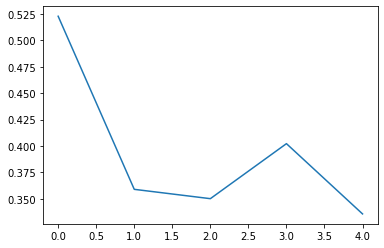

In [21]:
normalized = []
for year in daily["year"].unique():
    subset = daily[daily["year"] == year]
    subset["sell_delta"] = normalize([subset["sell_delta"]])[0]
    normalized.append(subset)
grouped = pd.concat(normalized).groupby("dayofWeek").mean().reset_index()
plt.plot(grouped["sell_delta"])

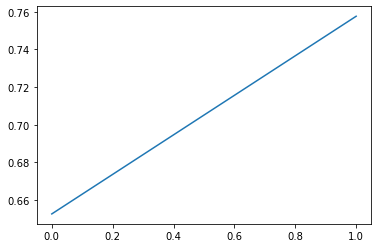

In [22]:
normalized = []
for year in quarterly["year"].unique():
    try:
        subset = quarterly[quarterly["year"] == year]
        subset["sell_delta"] = normalize([subset["sell_delta"]])[0]
        normalized.append(subset)
    except:
        continue
grouped = pd.concat(normalized).groupby("quarter").mean().reset_index()
plt.plot(grouped["sell_delta"])

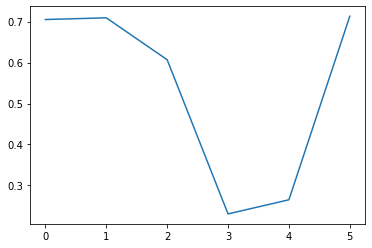

In [23]:
normalized = []
for year in monthly["year"].unique():
    try:
        subset = monthly[monthly["year"] == year]
        subset["sell_delta"] = normalize([subset["sell_delta"]])[0]
        normalized.append(subset)
    except:
        continue
grouped = pd.concat(normalized).groupby("month").mean().reset_index()
plt.plot(grouped["sell_delta"])

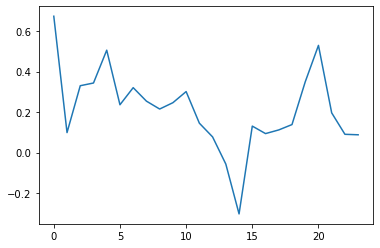

In [24]:
normalized = []
for year in weekly["year"].unique():
    try:
        subset = weekly[weekly["year"] == year]
        subset["sell_delta"] = normalize([subset["sell_delta"]])[0]
        normalized.append(subset)
    except:
        continue
grouped = pd.concat(normalized).groupby("week").mean().reset_index()
plt.plot(grouped["sell_delta"])

In [25]:
ntrades = []
trades.sort_values("date",inplace=True)
for year in trades["year"].unique():
    subset = trades[(trades["year"] == year)]
    for week in subset["week"].unique():
        ntrades.append(len(subset[(subset["week"] == week)]))
weekly["ntrades"]= ntrades

In [26]:
sp5.columns

Index(['_id', 'Symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub-Industry', 'Headquarters Location', 'Date first added', 'CIK',
       'Founded'],
      dtype='object')

In [27]:
trades["trade"] = 1

In [28]:
sp5["ticker"] = sp5["Symbol"]

In [29]:
ticker_yearly = trades.groupby(["year","ticker"]).sum().reset_index().merge(sp5, on="ticker",how="left")
yp = []
for year in ticker_yearly["year"].unique():
    yp.append(ticker_yearly[ticker_yearly["year"] == year].sort_values("sell_delta",ascending=False))
yp_final = pd.concat(yp)
yp_final["aggregate_gain"] = [(1+(row[1]["sell_delta"] / row[1]["trade"])) ** row[1]["trade"] - 1 for row in yp_final.iterrows()]
yp_final.sort_values("aggregate_gain",ascending=False)[["year","Security","ticker","GICS Sector","sell_delta","trade","aggregate_gain"]].head(50)

,year,Security,ticker,GICS Sector,sell_delta,trade,aggregate_gain
81,2016,"United Rentals, Inc.",URI,Industrials,0.267366,4,0.295387
102,2017,Freeport-McMoRan Inc.,FCX,Materials,0.226593,6,0.249095
83,2016,Western Digital,WDC,Information Technology,0.202564,5,0.219656
42,2016,Incyte,INCY,Health Care,0.182593,3,0.193931
55,2016,Micron Technology,MU,Information Technology,0.169796,5,0.181726
32,2016,Freeport-McMoRan Inc.,FCX,Materials,0.171702,3,0.181716
82,2016,Valero Energy,VLO,Energy,0.169781,3,0.179571
25,2016,Devon Energy,DVN,Energy,0.162573,3,0.171542
84,2016,Williams Companies,WMB,Energy,0.153567,6,0.163735
6,2016,Advanced Micro Devices Inc,AMD,Information Technology,0.124600,4,0.130543


In [30]:
ticker_analysis = trades.groupby("ticker").sum().reset_index().merge(sp5, on="ticker",how="left")
ticker_analysis["aggregate_gain"] = [(1+(row[1]["sell_delta"] / row[1]["trade"])) ** row[1]["trade"] - 1 for row in ticker_analysis.iterrows()]
ticker_analysis["average_gain"] = [(row[1]["sell_delta"] / row[1]["trade"]) for row in ticker_analysis.iterrows()]
ticker_analysis.sort_values("aggregate_gain",ascending=False)[["Security","ticker","sell_delta","trade","average_gain"]].head(50)

,Security,ticker,sell_delta,trade,average_gain
41,Freeport-McMoRan Inc.,FCX,0.398295,9,0.044255
101,"United Rentals, Inc.",URI,0.267366,4,0.066841
70,Micron Technology,MU,0.223073,8,0.027884
103,Western Digital,WDC,0.201302,6,0.033550
54,Incyte,INCY,0.189144,4,0.047286
102,Valero Energy,VLO,0.169781,3,0.056594
34,Devon Energy,DVN,0.162573,3,0.054191
104,Williams Companies,WMB,0.153567,6,0.025595
9,Advanced Micro Devices Inc,AMD,0.127636,5,0.025527
98,United Airlines Holdings,UAL,0.116432,5,0.023286


In [31]:
ticker_analysis = trades.merge(sp5, on="ticker",how="left").groupby("GICS Sector").sum().reset_index()
ticker_analysis["aggregate_gain"] = [(1+(row[1]["sell_delta"] / row[1]["trade"])) ** row[1]["trade"] - 1 for row in ticker_analysis.iterrows()]
ticker_analysis["average_gain"] = [(row[1]["sell_delta"] / row[1]["trade"]) for row in ticker_analysis.iterrows()]
ticker_analysis.sort_values("sell_delta",ascending=False)[["GICS Sector","sell_delta","trade","average_gain"]].head(50)

,GICS Sector,sell_delta,trade,average_gain
3,Energy,0.791911,51,0.015528
6,Industrials,0.788076,35,0.022516
7,Information Technology,0.751453,50,0.015029
5,Health Care,0.626646,31,0.020214
8,Materials,0.392694,30,0.013090
4,Financials,0.271787,13,0.020907
1,Consumer Discretionary,0.239554,26,0.009214
10,Utilities,0.087472,3,0.029157
0,Communication Services,0.054906,9,0.006101
9,Real Estate,0.033148,7,0.004735
